**PRQL**

In [ ]:
import numpy as np
import random

class GridEnv:
    def __init__(self, grid_size, start, goal):
        self.grid_size = grid_size
        self.start = start
        self.goal = goal
        self.state = start

    def reset(self):
        self.state = self.start
        return self.state

    def step(self, action):
        x, y = self.state
        if action == 0:   # Move up
            x = max(0, x - 1)
        elif action == 1: # Move right
            y = min(self.grid_size - 1, y + 1)
        elif action == 2: # Move down
            x = min(self.grid_size - 1, x + 1)
        elif action == 3: # Move left
            y = max(0, y - 1)

        self.state = (x, y)
        if self.state == self.goal:
            return self.state, 1, True  # Goal reached, reward = 1
        else:
            return self.state, -0.1, False  # Penalize for each step, reward = -0.1

    def get_state_space(self):
        return self.grid_size, self.grid_size

    def get_action_space(self):
        return 4  # up, right, down, left


In [ ]:
import matplotlib.pyplot as plt

class QLearning:
    def __init__(self, env, alpha=0.1, gamma=0.9, epsilon=0.1):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.q_table = np.zeros((*self.env.get_state_space(), self.env.get_action_space()))
        self.episode_rewards = []  # List to store rewards for each episode

    def choose_action(self, state):
        if random.uniform(0, 1) < self.epsilon:
            return random.randint(0, self.env.get_action_space() - 1)  # Explore
        else:
            return np.argmax(self.q_table[state[0], state[1], :])  # Exploit

    def update_q_table(self, state, action, reward, next_state):
        best_next_action = np.argmax(self.q_table[next_state[0], next_state[1], :])
        td_target = reward + self.gamma * self.q_table[next_state[0], next_state[1], best_next_action]
        td_error = td_target - self.q_table[state[0], state[1], action]
        self.q_table[state[0], state[1], action] += self.alpha * td_error

    def train(self, episodes):
        for episode in range(episodes):
            state = self.env.reset()
            done = False
            total_reward = 0
            while not done:
                action = self.choose_action(state)
                next_state, reward, done = self.env.step(action)
                self.update_q_table(state, action, reward, next_state)
                state = next_state
                total_reward += reward
            self.episode_rewards.append(total_reward)

        # Plot the rewards
        plt.plot(range(episodes), self.episode_rewards)
        plt.xlabel('Episode')
        plt.ylabel('Total Reward')
        plt.title('Total Reward per Episode')
        plt.show()

        # Plot the Q-values for the final state
        plt.imshow(self.q_table[:, :, :].max(axis=2), cmap='hot', interpolation='nearest')
        plt.colorbar()
        plt.title('Final Q-values Heatmap')
        plt.show()


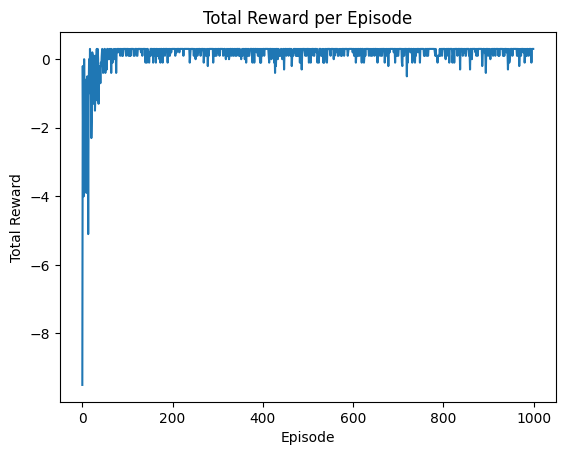

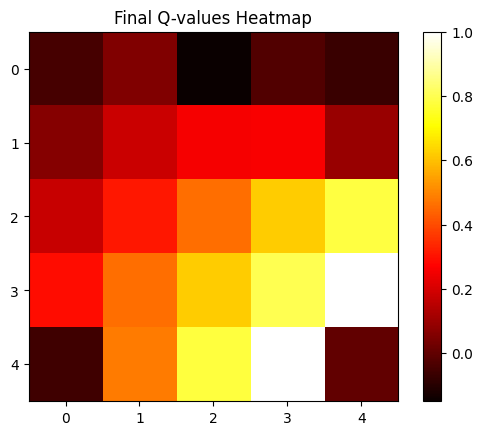

In [ ]:
# Define grid size, start, and goal
grid_size = 5
start = (0, 0)
goal = (4, 4)

# Initialize environment and Q-learning agent
env = GridEnv(grid_size, start, goal)
q_learning = QLearning(env)

# Train the agent
q_learning.train(1000)


In [ ]:
class QLearning:
    def __init__(self, env, alpha=0.1, gamma=0.9, epsilon=0.1):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.q_table = np.zeros((*self.env.get_state_space(), self.env.get_action_space()))

    def choose_action(self, state):
        if random.uniform(0, 1) < self.epsilon:
            return random.randint(0, self.env.get_action_space() - 1)  # Explore
        else:
            return np.argmax(self.q_table[state[0], state[1], :])  # Exploit

    def update_q_table(self, state, action, reward, next_state):
        best_next_action = np.argmax(self.q_table[next_state[0], next_state[1], :])
        td_target = reward + self.gamma * self.q_table[next_state[0], next_state[1], best_next_action]
        td_error = td_target - self.q_table[state[0], state[1], action]
        self.q_table[state[0], state[1], action] += self.alpha * td_error

    def train(self, episodes):
        for _ in range(episodes):
            state = self.env.reset()
            done = False
            while not done:
                action = self.choose_action(state)
                next_state, reward, done = self.env.step(action)
                self.update_q_table(state, action, reward, next_state)
                state = next_state

# Define grid size, start, and goal
grid_size = 5
start = (0, 0)
goal = (4, 4)

# Initialize environment and Q-learning agent
env = GridEnv(grid_size, start, goal)
q_learning = QLearning(env)

# Train the agent
q_learning.train(1000)

# Display learned Q-values
print("Learned Q-values:")
print(q_learning.q_table)


Learned Q-values:
[[[-1.53032481e-01 -4.34062000e-02 -1.35040642e-01 -1.44753476e-01]
  [-9.17925455e-02  3.18126110e-02  6.28820000e-02 -1.54024785e-01]
  [-1.64989838e-01 -1.19039723e-01  1.79149342e-01 -1.72986620e-01]
  [-1.03839580e-01 -1.11181247e-01  2.41317426e-01 -1.23546235e-01]
  [-6.79346521e-02 -6.79346521e-02 -1.32082596e-03 -7.37907302e-02]]

 [[-2.24906244e-01  5.31896205e-02 -2.26218520e-01 -1.96153622e-01]
  [-5.00381302e-02  1.80980000e-01  1.23997780e-01 -9.40116809e-02]
  [ 2.17236597e-02  3.12200000e-01  2.90057496e-01  4.15408451e-02]
  [ 1.16652324e-02  2.95668568e-01  4.58000000e-01  1.57524633e-01]
  [-4.98896778e-02  5.13697663e-03  5.73173940e-01 -4.03414118e-02]]

 [[-1.77928268e-01 -8.79158855e-02 -1.65015165e-01 -1.65138001e-01]
  [-1.20330844e-01  2.98514386e-01 -1.13208100e-01 -1.44925430e-01]
  [-5.04156313e-02  4.57990522e-01 -7.04311932e-02 -6.96391180e-02]
  [ 2.84718706e-01  5.91702041e-01  6.20000000e-01  2.98320316e-01]
  [ 2.21147769e-02  1.3295

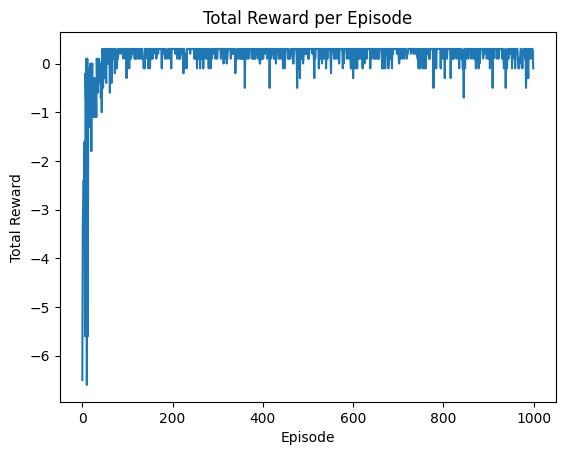

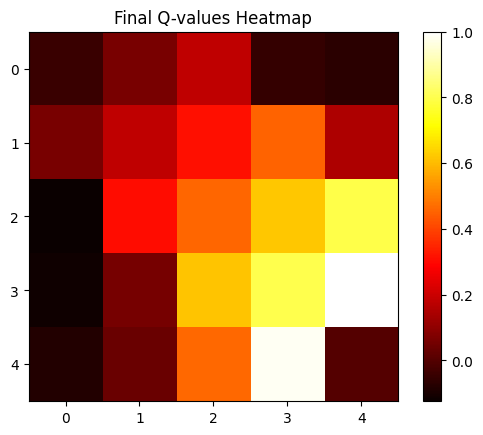

Learned Q-values:
[[[-0.14629894 -0.0434062  -0.08185681 -0.15981473]
  [-0.05697346  0.01565555  0.062882   -0.16907801]
  [-0.15698644 -0.16165939  0.17867962 -0.13897753]
  [-0.104587   -0.1070988  -0.05128412 -0.11258625]
  [-0.06785684 -0.06793465 -0.0678454  -0.07393883]]

 [[-0.20075596  0.06094667 -0.22170978 -0.22023437]
  [-0.04697367  0.18098     0.10549829 -0.06924289]
  [ 0.032522    0.25863031  0.3122      0.05145369]
  [-0.07047201 -0.0637546   0.45516512  0.02846919]
  [-0.04027004 -0.03940399  0.14917805 -0.00608102]]

 [[-0.1708455  -0.12443394 -0.16082055 -0.17318626]
  [-0.10036846  0.30970935 -0.11097058 -0.14679311]
  [ 0.16611591  0.458       0.3844317   0.14871686]
  [ 0.25399923  0.50451924  0.62        0.29893791]
  [-0.01664148 -0.0199      0.79512782  0.0278171 ]]

 [[-0.12175866 -0.11214696 -0.11505753 -0.11361513]
  [-0.05278467  0.05868844 -0.0782635  -0.08271336]
  [-0.04157568  0.61679332  0.03854491 -0.05230678]
  [ 0.39464361  0.8         0.69314924  

In [ ]:
# modified prql

import numpy as np
import random
import matplotlib.pyplot as plt

class GridEnv:
    def __init__(self, grid_size, start, goal):
        self.grid_size = grid_size
        self.start = start
        self.goal = goal
        self.state = start

    def reset(self):
        self.state = self.start
        return self.state

    def step(self, action):
        x, y = self.state
        if action == 0:   # Move up
            x = max(0, x - 1)
        elif action == 1: # Move right
            y = min(self.grid_size - 1, y + 1)
        elif action == 2: # Move down
            x = min(self.grid_size - 1, x + 1)
        elif action == 3: # Move left
            y = max(0, y - 1)

        self.state = (x, y)
        if self.state == self.goal:
            return self.state, 1, True  # Goal reached, reward = 1
        else:
            return self.state, -0.1, False  # Penalize for each step, reward = -0.1

    def get_state_space(self):
        return self.grid_size, self.grid_size

    def get_action_space(self):
        return 4  # up, right, down, left

class PolicyReuseQLearning:
    def __init__(self, env, alpha=0.1, gamma=0.9, epsilon=0.1, policy_library=None, psi=0.1):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.policy_library = policy_library if policy_library is not None else []
        self.psi = psi
        self.num_policies = len(self.policy_library) + 1
        self.q_table = np.zeros((*self.env.get_state_space(), self.env.get_action_space()))
        self.reuse_gains = np.zeros(self.num_policies)
        self.num_chosen = np.zeros(self.num_policies)
        self.episode_rewards = []

    def choose_action(self, state):
        if random.uniform(0, 1) < self.epsilon:
            return random.randint(0, self.env.get_action_space() - 1)  # Explore
        else:
            return np.argmax(self.q_table[state[0], state[1], :])  # Exploit

    def update_q_table(self, state, action, reward, next_state, policy=None):
        if policy is None:
            best_next_action = np.argmax(self.q_table[next_state[0], next_state[1], :])
            td_target = reward + self.gamma * self.q_table[next_state[0], next_state[1], best_next_action]
            td_error = td_target - self.q_table[state[0], state[1], action]
            self.q_table[state[0], state[1], action] += self.alpha * td_error
        else:
            x, y = state
            x_prime, y_prime = next_state
            self.q_table[x, y, action] = ((1 - self.alpha) * self.q_table[x, y, action]
                                          + self.alpha * (reward + self.gamma * np.max(policy[x_prime, y_prime, :])))

    def train(self, episodes):
        for episode in range(episodes):
            state = self.env.reset()
            done = False
            total_reward = 0
            while not done:
                reuse_idx = self.choose_from_policy_library()
                if reuse_idx == 0:
                    policy_fn = self.choose_action
                    policy = self.q_table
                else:
                    policy_fn = self.policy_reuse
                    policy = self.policy_library[reuse_idx - 1]

                action = policy_fn(state)
                next_state, reward, done = self.env.step(action)
                self.update_q_table(state, action, reward, next_state, policy)
                state = next_state
                total_reward += reward

            self.episode_rewards.append(total_reward)

        # Plot the rewards
        plt.plot(range(episodes), self.episode_rewards)
        plt.xlabel('Episode')
        plt.ylabel('Total Reward')
        plt.title('Total Reward per Episode')
        plt.show()

        # Plot the Q-values for the final state
        plt.imshow(self.q_table[:, :, :].max(axis=2), cmap='hot', interpolation='nearest')
        plt.colorbar()
        plt.title('Final Q-values Heatmap')
        plt.show()

    def policy_reuse(self, policy, state):
        x, y = state
        rdn = np.random.uniform(0, 1)
        if rdn < self.psi:
            return np.argmax(policy[x, y, :])
        else:
            return self.choose_action(state)

    def choose_from_policy_library(self):
      if not self.episode_rewards:
        tau = 1  # Default value if no episodes have been completed
      else:
        tau = self.episode_rewards[-1] * 0.05

      exponent = np.exp(self.reuse_gains * tau)
      logits = exponent / np.sum(exponent)

      return np.random.choice(self.num_policies, p=logits)


# Define grid size, start, and goal
grid_size = 5
start = (0, 0)
goal = (4, 4)

# Initialize environment and Q-learning agent
env = GridEnv(grid_size, start, goal)
policy_library = []  # You can add pre-trained policies here
prql = PolicyReuseQLearning(env, policy_library=policy_library)

# Train the agent
prql.train(1000)

# Display learned Q-values
print("Learned Q-values:")
print(prql.q_table)


**OPS TL**

In [ ]:
import numpy as np
import random

# Define the grid environment
class GridEnv:
    def __init__(self, grid_size=5, start=(0, 0), goal=(4, 4)):
        self.grid_size = grid_size
        self.start = start
        self.goal = goal
        self.state = start

    def reset(self):
        self.state = self.start
        return self.state

    def step(self, action):
        x, y = self.state
        if action == 0:  # Up
            y = max(0, y - 1)
        elif action == 1:  # Down
            y = min(self.grid_size - 1, y + 1)
        elif action == 2:  # Left
            x = max(0, x - 1)
        elif action == 3:  # Right
            x = min(self.grid_size - 1, x + 1)

        self.state = (x, y)
        reward = 1 if self.state == self.goal else -1
        done = self.state == self.goal
        return self.state, reward, done

# Q-Learning with OPS-TL
class QLearning:
    def __init__(self, env, alpha=0.1, gamma=0.9, epsilon=0.1, episodes=500):
        self.env = env
        self.alpha = alpha  # Learning rate
        self.gamma = gamma  # Discount factor
        self.epsilon = epsilon  # Exploration rate
        self.episodes = episodes
        self.q_table = np.zeros((env.grid_size, env.grid_size, 4))  # Initialize Q-table

    def choose_action(self, state):
        if random.uniform(0, 1) < self.epsilon:  # Exploration
            return np.random.randint(0, 4)
        else:  # Exploitation
            return np.argmax(self.q_table[state[0], state[1]])

    def update_q_value(self, state, action, reward, next_state):
        q_predict = self.q_table[state[0], state[1], action]
        q_target = reward + self.gamma * np.max(self.q_table[next_state[0], next_state[1]])
        self.q_table[state[0], state[1], action] += self.alpha * (q_target - q_predict)

    def learn(self):
        for episode in range(self.episodes):
            state = self.env.reset()
            done = False
            while not done:
                action = self.choose_action(state)
                next_state, reward, done = self.env.step(action)
                self.update_q_value(state, action, reward, next_state)
                state = next_state
            # Apply OPS-TL after each episode to choose the best learned policy
            self.apply_ops_tl()

    def apply_ops_tl(self):
        # Assume we have a set of pre-trained Q-tables from other tasks
        # Here we are just simulating transfer learning from multiple tasks
        pre_trained_q_tables = [np.random.random((self.env.grid_size, self.env.grid_size, 4)) for _ in range(5)]

        # Calculate the value function for the current learned Q-table
        current_q_value = np.sum(np.max(self.q_table, axis=2))

        # Compare with the pre-trained Q-tables to find the best one to transfer
        best_q_table = self.q_table
        best_value = current_q_value

        for q_table in pre_trained_q_tables:
            q_value = np.sum(np.max(q_table, axis=2))
            if q_value > best_value:
                best_q_table = q_table
                best_value = q_value

        # Transfer the best policy
        self.q_table = best_q_table
        print(f"OPS-TL selected a policy with value: {best_value}")


if __name__ == "__main__":
    # Define environment and Q-learning agent
    env = GridEnv()
    agent = QLearning(env)

    # Start learning
    agent.learn()

    # Print learned Q-table
    print("Learned Q-table:")
    print(agent.q_table)


OPS-TL selected a policy with value: 20.87923921810905
OPS-TL selected a policy with value: 20.434176741899872
OPS-TL selected a policy with value: 20.96105455779109
OPS-TL selected a policy with value: 20.176429038202194
OPS-TL selected a policy with value: 21.669058511224154
OPS-TL selected a policy with value: 21.950081099291168
OPS-TL selected a policy with value: 21.862310690168428
OPS-TL selected a policy with value: 20.991987507329462
OPS-TL selected a policy with value: 20.317405062593696
OPS-TL selected a policy with value: 20.695906279891265
OPS-TL selected a policy with value: 22.04498259697125
OPS-TL selected a policy with value: 20.977605762595694
OPS-TL selected a policy with value: 20.157516235699553
OPS-TL selected a policy with value: 20.774233505720083
OPS-TL selected a policy with value: 21.099904461092116
OPS-TL selected a policy with value: 20.739242077090804
OPS-TL selected a policy with value: 20.94711547778943
OPS-TL selected a policy with value: 20.900737741155

OPS-TL selected a policy with value: 21.416054260977543
OPS-TL selected a policy with value: 20.307926816003565
OPS-TL selected a policy with value: 20.72184482214958
OPS-TL selected a policy with value: 19.911120615503766
OPS-TL selected a policy with value: 21.117623305097165
OPS-TL selected a policy with value: 20.94244150011357
OPS-TL selected a policy with value: 21.145366734205236
OPS-TL selected a policy with value: 19.61892275056414
OPS-TL selected a policy with value: 21.15608329988358
OPS-TL selected a policy with value: 20.926462864730784
OPS-TL selected a policy with value: 20.84382345146294
OPS-TL selected a policy with value: 21.038556908045262
OPS-TL selected a policy with value: 20.09277728576102
OPS-TL selected a policy with value: 20.10899157116813
OPS-TL selected a policy with value: 20.98515158428421
OPS-TL selected a policy with value: 20.790854358488936
OPS-TL selected a policy with value: 20.062011666533547
OPS-TL selected a policy with value: 20.25266486870783
O

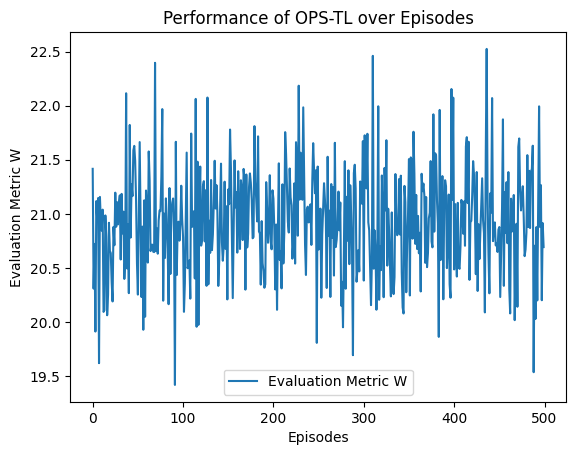

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

class GridEnv:
    def __init__(self, grid_size=5, start=(0, 0), goal=(4, 4)):
        self.grid_size = grid_size
        self.start = start
        self.goal = goal
        self.state = start

    def reset(self):
        self.state = self.start
        return self.state

    def step(self, action):
        x, y = self.state
        if action == 0:  # Up
            y = max(0, y - 1)
        elif action == 1:  # Down
            y = min(self.grid_size - 1, y + 1)
        elif action == 2:  # Left
            x = max(0, x - 1)
        elif action == 3:  # Right
            x = min(self.grid_size - 1, x + 1)

        self.state = (x, y)
        reward = 1 if self.state == self.goal else -1
        done = self.state == self.goal
        return self.state, reward, done

class QLearning:
    def __init__(self, env, alpha=0.1, gamma=0.9, epsilon=0.1, episodes=500):
        self.env = env
        self.alpha = alpha  # Learning rate
        self.gamma = gamma  # Discount factor
        self.epsilon = epsilon  # Exploration rate
        self.episodes = episodes
        self.q_table = np.zeros((env.grid_size, env.grid_size, 4))  # Initialize Q-table
        self.evaluation_metrics = []

    def choose_action(self, state):
        if random.uniform(0, 1) < self.epsilon:  # Exploration
            return np.random.randint(0, 4)
        else:  # Exploitation
            return np.argmax(self.q_table[state[0], state[1]])

    def update_q_value(self, state, action, reward, next_state):
        q_predict = self.q_table[state[0], state[1], action]
        q_target = reward + self.gamma * np.max(self.q_table[next_state[0], next_state[1]])
        self.q_table[state[0], state[1], action] += self.alpha * (q_target - q_predict)

    def learn(self):
        for episode in range(self.episodes):
            state = self.env.reset()
            done = False
            while not done:
                action = self.choose_action(state)
                next_state, reward, done = self.env.step(action)
                self.update_q_value(state, action, reward, next_state)
                state = next_state

            # Apply OPS-TL after each episode to choose the best learned policy
            self.apply_ops_tl()

            # Track evaluation metric W
            evaluation_metric = np.sum(np.max(self.q_table, axis=2))
            self.evaluation_metrics.append(evaluation_metric)

    def apply_ops_tl(self):
        pre_trained_q_tables = [np.random.random((self.env.grid_size, self.env.grid_size, 4)) for _ in range(5)]

        current_q_value = np.sum(np.max(self.q_table, axis=2))

        best_q_table = self.q_table
        best_value = current_q_value

        for q_table in pre_trained_q_tables:
            q_value = np.sum(np.max(q_table, axis=2))
            if q_value > best_value:
                best_q_table = q_table
                best_value = q_value

        self.q_table = best_q_table
        print(f"OPS-TL selected a policy with value: {best_value}")

if __name__ == "__main__":
    # Define environment and Q-learning agent
    env = GridEnv()
    agent = QLearning(env)

    # Start learning
    agent.learn()

    # Plot evaluation metric W against episodes
    plt.plot(range(agent.episodes), agent.evaluation_metrics, label='Evaluation Metric W')
    plt.xlabel('Episodes')
    plt.ylabel('Evaluation Metric W')
    plt.title('Performance of OPS-TL over Episodes')
    plt.legend()
    plt.show()


OPS-TL selected a policy with value: 21.111257921054122
OPS-TL selected a policy with value: 20.662221195799177
OPS-TL selected a policy with value: 21.151512393148668
OPS-TL selected a policy with value: 20.651417922664542
OPS-TL selected a policy with value: 20.926595559778452
OPS-TL selected a policy with value: 20.2453500195074
OPS-TL selected a policy with value: 21.24790618086634
OPS-TL selected a policy with value: 20.64044135104121
OPS-TL selected a policy with value: 21.213106416049804
OPS-TL selected a policy with value: 21.038841219649065
OPS-TL selected a policy with value: 20.842748753836272
OPS-TL selected a policy with value: 20.556368389693873
OPS-TL selected a policy with value: 21.519239333275042
OPS-TL selected a policy with value: 21.304284939937745
OPS-TL selected a policy with value: 21.378467148235867
OPS-TL selected a policy with value: 20.373165887678166
OPS-TL selected a policy with value: 21.34373407283209
OPS-TL selected a policy with value: 20.3028562766807

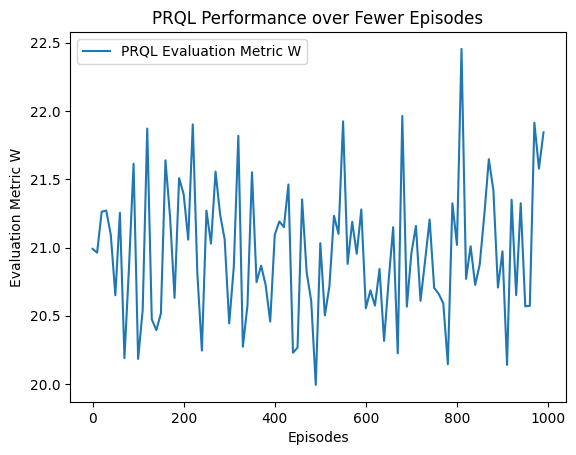

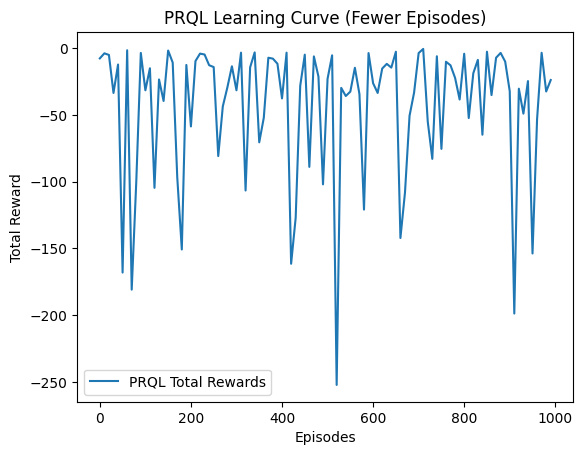

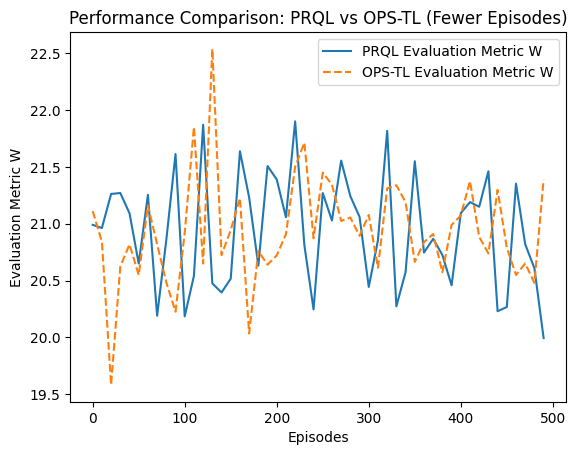

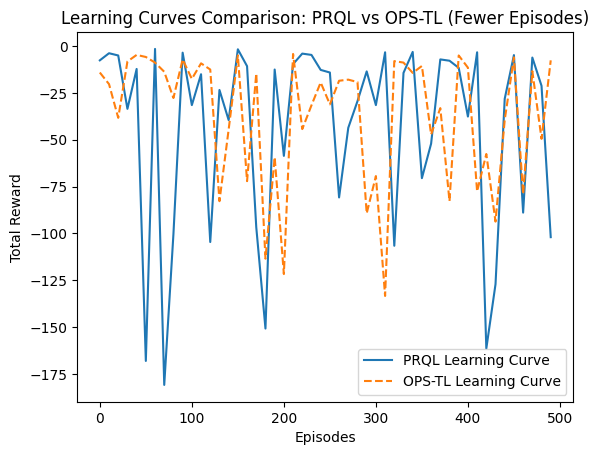

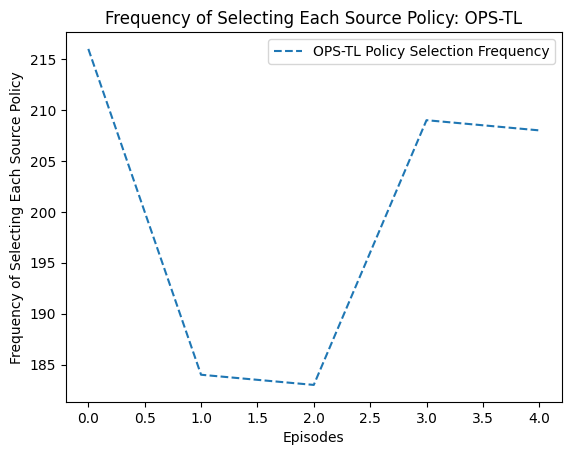

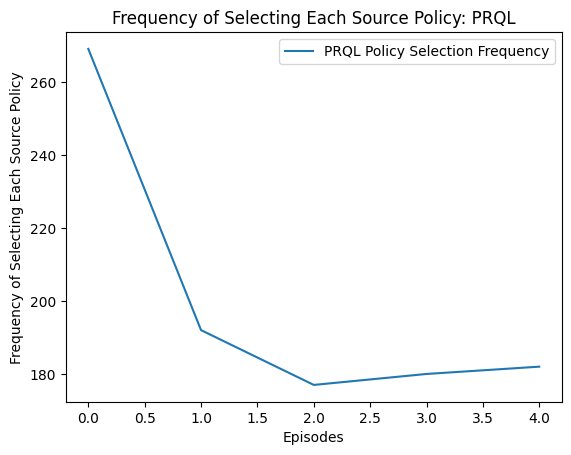

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

class GridEnv:
    def __init__(self, grid_size=5, start=(0, 0), goal=(4, 4)):
        self.grid_size = grid_size
        self.start = start
        self.goal = goal
        self.state = start

    def reset(self):
        self.state = self.start
        return self.state

    def step(self, action):
        x, y = self.state
        if action == 0:  # Up
            y = max(0, y - 1)
        elif action == 1:  # Down
            y = min(self.grid_size - 1, y + 1)
        elif action == 2:  # Left
            x = max(0, x - 1)
        elif action == 3:  # Right
            x = min(self.grid_size - 1, x + 1)

        self.state = (x, y)
        reward = 1 if self.state == self.goal else -0.1
        done = self.state == self.goal
        return self.state, reward, done

class QLearningOPS:
    def __init__(self, env, alpha=0.1, gamma=0.9, epsilon=0.1, episodes=500):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.episodes = episodes
        self.q_table = np.zeros((env.grid_size, env.grid_size, 4))
        self.evaluation_metrics = []
        self.total_rewards = []
        self.policy_selection_frequency = np.zeros(5)

    def choose_action(self, state):
        if random.uniform(0, 1) < self.epsilon:
            return np.random.randint(0, 4)
        else:
            return np.argmax(self.q_table[state[0], state[1]])

    def update_q_value(self, state, action, reward, next_state):
        q_predict = self.q_table[state[0], state[1], action]
        q_target = reward + self.gamma * np.max(self.q_table[next_state[0], next_state[1]])
        self.q_table[state[0], state[1], action] += self.alpha * (q_target - q_predict)

    def learn(self):
        for episode in range(self.episodes):
            state = self.env.reset()
            done = False
            total_reward = 0
            while not done:
                action = self.choose_action(state)
                next_state, reward, done = self.env.step(action)
                self.update_q_value(state, action, reward, next_state)
                state = next_state
                total_reward += reward

            self.apply_ops_tl()
            evaluation_metric = np.sum(np.max(self.q_table, axis=2))
            self.evaluation_metrics.append(evaluation_metric)
            self.total_rewards.append(total_reward)

    def apply_ops_tl(self):
        pre_trained_q_tables = [np.random.random((self.env.grid_size, self.env.grid_size, 4)) for _ in range(5)]
        current_q_value = np.sum(np.max(self.q_table, axis=2))
        best_q_table = self.q_table
        best_value = current_q_value
        best_index = 0

        for i, q_table in enumerate(pre_trained_q_tables):
            q_value = np.sum(np.max(q_table, axis=2))
            if q_value > best_value:
                best_q_table = q_table
                best_value = q_value
                best_index = i

        self.q_table = best_q_table
        self.policy_selection_frequency[best_index] += 1
        print(f"OPS-TL selected a policy with value: {best_value}")

class QLearningPRQL:
    def __init__(self, env, alpha=0.1, gamma=0.9, epsilon=0.1, episodes=500):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.episodes = episodes
        self.q_table = np.zeros((env.grid_size, env.grid_size, 4))
        self.evaluation_metrics = []
        self.total_rewards = []
        self.policy_selection_frequency = np.zeros(5)

    def choose_action(self, state):
        if random.uniform(0, 1) < self.epsilon:
            return np.random.randint(0, 4)
        else:
            return np.argmax(self.q_table[state[0], state[1]])

    def update_q_value(self, state, action, reward, next_state):
        q_predict = self.q_table[state[0], state[1], action]
        q_target = reward + self.gamma * np.max(self.q_table[next_state[0], next_state[1]])
        self.q_table[state[0], state[1], action] += self.alpha * (q_target - q_predict)

    def apply_prql(self):
        pre_trained_q_tables = [np.random.random((self.env.grid_size, self.env.grid_size, 4)) for _ in range(5)]
        current_q_value = np.sum(np.max(self.q_table, axis=2))
        best_q_table = self.q_table
        best_value = current_q_value
        best_index = 0

        for i, q_table in enumerate(pre_trained_q_tables):
            q_value = np.sum(np.max(q_table, axis=2))
            if q_value > best_value:
                best_q_table = q_table
                best_value = q_value
                best_index = i

        self.q_table = best_q_table
        self.policy_selection_frequency[best_index] += 1
        print(f"PRQL selected a policy with value: {best_value}")

    def train(self):
        for episode in range(self.episodes):
            state = self.env.reset()
            done = False
            total_reward = 0
            while not done:
                action = self.choose_action(state)
                next_state, reward, done = self.env.step(action)
                self.update_q_value(state, action, reward, next_state)
                state = next_state
                total_reward += reward

            self.apply_prql()
            evaluation_metric = np.sum(np.max(self.q_table, axis=2))
            self.evaluation_metrics.append(evaluation_metric)
            self.total_rewards.append(total_reward)

        # Smoothing the curves by selecting fewer episodes
        selected_episodes = range(0, self.episodes, 10)
        plt.plot(selected_episodes, np.array(self.evaluation_metrics)[selected_episodes], label='PRQL Evaluation Metric W')
        plt.xlabel('Episodes')
        plt.ylabel('Evaluation Metric W')
        plt.title('PRQL Performance over Fewer Episodes')
        plt.legend()
        plt.show()

        plt.plot(selected_episodes, np.array(self.total_rewards)[selected_episodes], label='PRQL Total Rewards')
        plt.xlabel('Episodes')
        plt.ylabel('Total Reward')
        plt.title('PRQL Learning Curve (Fewer Episodes)')
        plt.legend()
        plt.show()

if __name__ == "__main__":
    env = GridEnv()
    ops_tl_agent = QLearningOPS(env, episodes=1000)
    ops_tl_agent.learn()

    prql_agent = QLearningPRQL(env, episodes=1000)
    prql_agent.train()

    selected_episodes = range(0, 500, 10)

    plt.plot(selected_episodes, np.array(prql_agent.evaluation_metrics)[selected_episodes], label='PRQL Evaluation Metric W')
    plt.plot(selected_episodes, np.array(ops_tl_agent.evaluation_metrics)[selected_episodes], label='OPS-TL Evaluation Metric W', linestyle='--')
    plt.xlabel('Episodes')
    plt.ylabel('Evaluation Metric W')
    plt.title('Performance Comparison: PRQL vs OPS-TL (Fewer Episodes)')
    plt.legend()
    plt.show()

    plt.plot(selected_episodes, np.array(prql_agent.total_rewards)[selected_episodes], label='PRQL Learning Curve')
    plt.plot(selected_episodes, np.array(ops_tl_agent.total_rewards)[selected_episodes], label='OPS-TL Learning Curve', linestyle='--')
    plt.xlabel('Episodes')
    plt.ylabel('Total Reward')
    plt.title('Learning Curves Comparison: PRQL vs OPS-TL (Fewer Episodes)')
    plt.legend()
    plt.show()

    plt.plot(range(len(ops_tl_agent.policy_selection_frequency)), ops_tl_agent.policy_selection_frequency, label='OPS-TL Policy Selection Frequency', linestyle='--')
    plt.xlabel('Episodes')
    plt.ylabel('Frequency of Selecting Each Source Policy')
    plt.title('Frequency of Selecting Each Source Policy: OPS-TL')
    plt.legend()
    plt.show()

    plt.plot(range(len(prql_agent.policy_selection_frequency)), prql_agent.policy_selection_frequency, label='PRQL Policy Selection Frequency')
    plt.xlabel('Episodes')
    plt.ylabel('Frequency of Selecting Each Source Policy')
    plt.title('Frequency of Selecting Each Source Policy: PRQL')
    plt.legend()
    plt.show()


**TRADITIONAL Q-LEARNING**

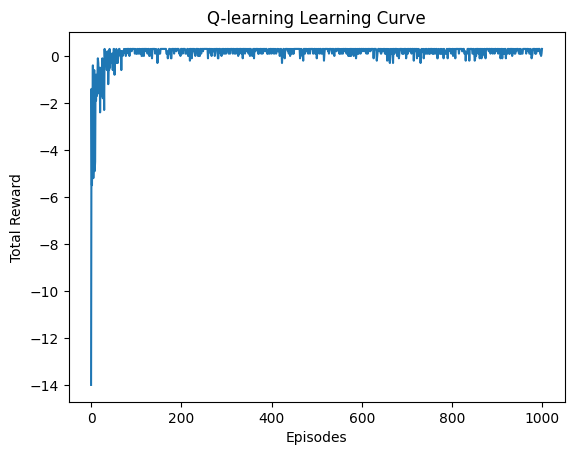

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

class GridWorld:
    def __init__(self, grid_size=5, start=(0, 0), goal=(4, 4), obstacles=[]):
        self.grid_size = grid_size
        self.start = start
        self.goal = goal
        self.obstacles = obstacles
        self.state = start

    def reset(self):
        self.state = self.start
        return self.state

    def step(self, action):
        x, y = self.state

        if action == 0:  # Up
            y = max(0, y - 1)
        elif action == 1:  # Down
            y = min(self.grid_size - 1, y + 1)
        elif action == 2:  # Left
            x = max(0, x - 1)
        elif action == 3:  # Right
            x = min(self.grid_size - 1, x + 1)

        # Update state
        next_state = (x, y)

        # If the new state is an obstacle, stay in the same state
        if next_state in self.obstacles:
            next_state = self.state

        # Check if the agent has reached the goal
        if next_state == self.goal:
            reward = 1  # Reward for reaching the goal
            done = True
        else:
            reward = -0.1  # Small penalty for each step
            done = False

        self.state = next_state
        return next_state, reward, done

class QLearning:
    def __init__(self, env, alpha=0.1, gamma=0.9, epsilon=0.1, episodes=500):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.episodes = episodes
        self.q_table = np.zeros((env.grid_size, env.grid_size, 4))  # Q-table for 4 actions (up, down, left, right)
        self.total_rewards = []

    def choose_action(self, state):
        # Epsilon-greedy action selection
        if random.uniform(0, 1) < self.epsilon:
            return np.random.randint(0, 4)  # Explore: Choose random action
        else:
            return np.argmax(self.q_table[state[0], state[1]])  # Exploit: Choose best action based on Q-table

    def update_q_value(self, state, action, reward, next_state):
        # Q-learning update formula
        q_predict = self.q_table[state[0], state[1], action]
        q_target = reward + self.gamma * np.max(self.q_table[next_state[0], next_state[1]])  # Bellman equation
        self.q_table[state[0], state[1], action] += self.alpha * (q_target - q_predict)

    def train(self):
        for episode in range(self.episodes):
            state = self.env.reset()  # Reset environment to the start state
            done = False
            total_reward = 0

            while not done:
                action = self.choose_action(state)  # Choose action using epsilon-greedy policy
                next_state, reward, done = self.env.step(action)  # Take action and get next state and reward
                self.update_q_value(state, action, reward, next_state)  # Update Q-value

                state = next_state  # Move to the next state
                total_reward += reward

            self.total_rewards.append(total_reward)  # Record the total reward for this episode

    def plot_learning_curve(self):
        plt.plot(self.total_rewards)
        plt.xlabel('Episodes')
        plt.ylabel('Total Reward')
        plt.title('Q-learning Learning Curve')
        plt.show()

if __name__ == "__main__":
    # Create grid world environment (5x5 grid, start at (0, 0), goal at (4, 4), obstacles at specified locations)
    obstacles = [(2, 2), (3, 2)]  # Obstacles that the agent needs to avoid
    env = GridWorld(grid_size=5, start=(0, 0), goal=(4, 4), obstacles=obstacles)

    # Create Q-learning agent
    q_agent = QLearning(env, episodes=1000)

    # Train the agent
    q_agent.train()

    # Plot learning curve
    q_agent.plot_learning_curve()


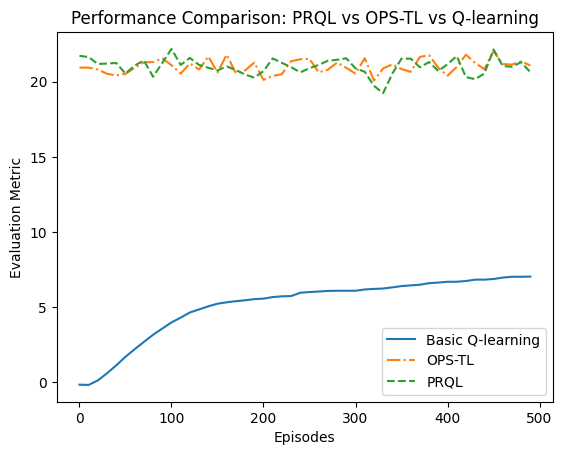

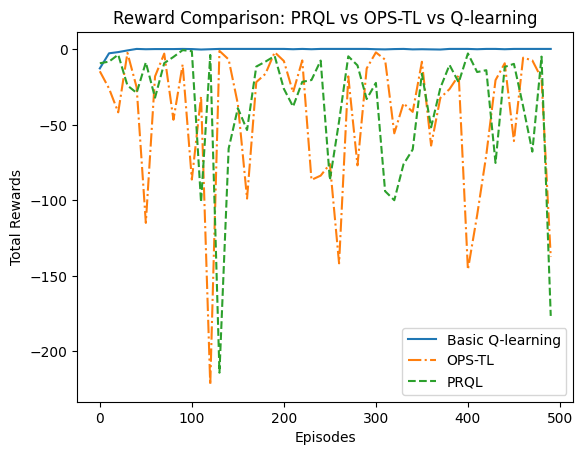

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Environment setup
class GridEnv:
    def __init__(self, grid_size=5, start=(0, 0), goal=(4, 4), obstacles=[]):
        self.grid_size = grid_size
        self.start = start
        self.goal = goal
        self.obstacles = obstacles
        self.state = start

    def reset(self):
        self.state = self.start
        return self.state

    def step(self, action):
        x, y = self.state
        if action == 0:  # Up
            y = max(0, y - 1)
        elif action == 1:  # Down
            y = min(self.grid_size - 1, y + 1)
        elif action == 2:  # Left
            x = max(0, x - 1)
        elif action == 3:  # Right
            x = min(self.grid_size - 1, x + 1)

        next_state = (x, y)

        if next_state in self.obstacles:
            next_state = self.state

        reward = 1 if next_state == self.goal else -0.1
        done = next_state == self.goal
        self.state = next_state
        return next_state, reward, done

# Basic Q-learning implementation
class QLearningBasic:
    def __init__(self, env, alpha=0.1, gamma=0.9, epsilon=0.1, episodes=500):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.episodes = episodes
        self.q_table = np.zeros((env.grid_size, env.grid_size, 4))
        self.evaluation_metrics = []
        self.total_rewards = []

    def choose_action(self, state):
        if random.uniform(0, 1) < self.epsilon:
            return np.random.randint(0, 4)
        else:
            return np.argmax(self.q_table[state[0], state[1]])

    def update_q_value(self, state, action, reward, next_state):
        q_predict = self.q_table[state[0], state[1], action]
        q_target = reward + self.gamma * np.max(self.q_table[next_state[0], next_state[1]])
        self.q_table[state[0], state[1], action] += self.alpha * (q_target - q_predict)

    def learn(self):
        for episode in range(self.episodes):
            state = self.env.reset()
            done = False
            total_reward = 0
            while not done:
                action = self.choose_action(state)
                next_state, reward, done = self.env.step(action)
                self.update_q_value(state, action, reward, next_state)
                state = next_state
                total_reward += reward

            evaluation_metric = np.sum(np.max(self.q_table, axis=2))
            self.evaluation_metrics.append(evaluation_metric)
            self.total_rewards.append(total_reward)

# OPS-TL implementation
class QLearningOPS:
    def __init__(self, env, alpha=0.1, gamma=0.9, epsilon=0.1, episodes=500):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.episodes = episodes
        self.q_table = np.zeros((env.grid_size, env.grid_size, 4))
        self.evaluation_metrics = []
        self.total_rewards = []
        self.policy_selection_frequency = np.zeros(5)

    def choose_action(self, state):
        if random.uniform(0, 1) < self.epsilon:
            return np.random.randint(0, 4)
        else:
            return np.argmax(self.q_table[state[0], state[1]])

    def update_q_value(self, state, action, reward, next_state):
        q_predict = self.q_table[state[0], state[1], action]
        q_target = reward + self.gamma * np.max(self.q_table[next_state[0], next_state[1]])
        self.q_table[state[0], state[1], action] += self.alpha * (q_target - q_predict)

    def learn(self):
        for episode in range(self.episodes):
            state = self.env.reset()
            done = False
            total_reward = 0
            while not done:
                action = self.choose_action(state)
                next_state, reward, done = self.env.step(action)
                self.update_q_value(state, action, reward, next_state)
                state = next_state
                total_reward += reward

            self.apply_ops_tl()
            evaluation_metric = np.sum(np.max(self.q_table, axis=2))
            self.evaluation_metrics.append(evaluation_metric)
            self.total_rewards.append(total_reward)

    def apply_ops_tl(self):
        pre_trained_q_tables = [np.random.random((self.env.grid_size, self.env.grid_size, 4)) for _ in range(5)]
        current_q_value = np.sum(np.max(self.q_table, axis=2))
        best_q_table = self.q_table
        best_value = current_q_value
        best_index = 0

        for i, q_table in enumerate(pre_trained_q_tables):
            q_value = np.sum(np.max(q_table, axis=2))
            if q_value > best_value:
                best_q_table = q_table
                best_value = q_value
                best_index = i

        self.q_table = best_q_table
        self.policy_selection_frequency[best_index] += 1

# PRQL implementation
class QLearningPRQL:
    def __init__(self, env, alpha=0.1, gamma=0.9, epsilon=0.1, episodes=500):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.episodes = episodes
        self.q_table = np.zeros((env.grid_size, env.grid_size, 4))
        self.evaluation_metrics = []
        self.total_rewards = []
        self.policy_selection_frequency = np.zeros(5)

    def choose_action(self, state):
        if random.uniform(0, 1) < self.epsilon:
            return np.random.randint(0, 4)
        else:
            return np.argmax(self.q_table[state[0], state[1]])

    def update_q_value(self, state, action, reward, next_state):
        q_predict = self.q_table[state[0], state[1], action]
        q_target = reward + self.gamma * np.max(self.q_table[next_state[0], next_state[1]])
        self.q_table[state[0], state[1], action] += self.alpha * (q_target - q_predict)

    def train(self):
        for episode in range(self.episodes):
            state = self.env.reset()
            done = False
            total_reward = 0
            while not done:
                action = self.choose_action(state)
                next_state, reward, done = self.env.step(action)
                self.update_q_value(state, action, reward, next_state)
                state = next_state
                total_reward += reward

            self.apply_prql()
            evaluation_metric = np.sum(np.max(self.q_table, axis=2))
            self.evaluation_metrics.append(evaluation_metric)
            self.total_rewards.append(total_reward)

    def apply_prql(self):
        pre_trained_q_tables = [np.random.random((self.env.grid_size, self.env.grid_size, 4)) for _ in range(5)]
        current_q_value = np.sum(np.max(self.q_table, axis=2))
        best_q_table = self.q_table
        best_value = current_q_value
        best_index = 0

        for i, q_table in enumerate(pre_trained_q_tables):
            q_value = np.sum(np.max(q_table, axis=2))
            if q_value > best_value:
                best_q_table = q_table
                best_value = q_value
                best_index = i

        self.q_table = best_q_table
        self.policy_selection_frequency[best_index] += 1

# Main comparison and plotting
if __name__ == "__main__":
    env = GridEnv(obstacles=[(2, 2), (3, 2)])

    # Initialize agents
    q_basic_agent = QLearningBasic(env, episodes=500)
    ops_tl_agent = QLearningOPS(env, episodes=500)
    prql_agent = QLearningPRQL(env, episodes=500)

    # Train all agents
    q_basic_agent.learn()
    ops_tl_agent.learn()
    prql_agent.train()

    selected_episodes = range(0, 500, 10)

    # Evaluation metric comparison
    plt.plot(selected_episodes, np.array(q_basic_agent.evaluation_metrics)[selected_episodes], label='Basic Q-learning', linestyle='-')
    plt.plot(selected_episodes, np.array(ops_tl_agent.evaluation_metrics)[selected_episodes], label='OPS-TL', linestyle='dashdot')
    plt.plot(selected_episodes, np.array(prql_agent.evaluation_metrics)[selected_episodes], label='PRQL', linestyle='dashed')
    plt.xlabel('Episodes')
    plt.ylabel('Evaluation Metric')
    plt.title('Performance Comparison: PRQL vs OPS-TL vs Q-learning')
    plt.legend()
    plt.show()

    # Reward comparison
    plt.plot(selected_episodes, np.array(q_basic_agent.total_rewards)[selected_episodes], label='Basic Q-learning', linestyle='-')
    plt.plot(selected_episodes, np.array(ops_tl_agent.total_rewards)[selected_episodes], label='OPS-TL', linestyle='dashdot')
    plt.plot(selected_episodes, np.array(prql_agent.total_rewards)[selected_episodes], label='PRQL', linestyle='dashed')
    plt.xlabel('Episodes')
    plt.ylabel('Total Rewards')
    plt.title('Reward Comparison: PRQL vs OPS-TL vs Q-learning')
    plt.legend()
    plt.show()


In [ ]:
# Calculate average metrics for each agent
def print_summary(agent_name, evaluation_metrics, total_rewards):
    avg_evaluation = np.mean(evaluation_metrics)
    avg_total_reward = np.mean(total_rewards)
    print(f"{agent_name} - Average Evaluation Metric: {avg_evaluation:.2f}")
    print(f"{agent_name} - Average Total Reward: {avg_total_reward:.2f}")

# Print summaries for each agent
print_summary('Basic Q-learning', q_basic_agent.evaluation_metrics, q_basic_agent.total_rewards)
print_summary('OPS-TL', ops_tl_agent.evaluation_metrics, ops_tl_agent.total_rewards)
print_summary('PRQL', prql_agent.evaluation_metrics, prql_agent.total_rewards)




Basic Q-learning - Average Evaluation Metric: 5.17
Basic Q-learning - Average Total Reward: 0.04
OPS-TL - Average Evaluation Metric: 20.90
OPS-TL - Average Total Reward: -44.99
PRQL - Average Evaluation Metric: 20.89
PRQL - Average Total Reward: -43.68


In [ ]:
def print_summary(agent_name, evaluation_metrics, total_rewards):
    avg_evaluation = np.mean(evaluation_metrics)
    avg_total_reward = np.mean(total_rewards)
    print(f"{agent_name} - Average Evaluation Metric: {avg_evaluation:.2f}")
    print(f"{agent_name} - Average Total Reward: {avg_total_reward:.2f}")

if __name__ == "__main__":
    env = GridEnv()

    # Initialize and train OPS-TL agent
    ops_tl_agent = QLearningOPS(env, episodes=1000)
    ops_tl_agent.learn()

    # Initialize and train PRQL agent
    prql_agent = QLearningPRQL(env, episodes=1000)
    prql_agent.train()

    # Print summaries for each agent
    print_summary('OPS-TL', ops_tl_agent.evaluation_metrics, ops_tl_agent.total_rewards)
    print_summary('PRQL', prql_agent.evaluation_metrics, prql_agent.total_rewards)


OPS-TL - Average Evaluation Metric: 20.95
OPS-TL - Average Total Reward: -39.95
PRQL - Average Evaluation Metric: 20.93
PRQL - Average Total Reward: -39.25


In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Environment setup
class GridEnv:
    def __init__(self, grid_size=5, start=(0, 0), goal=(4, 4), obstacles=None):
        if obstacles is None:
            obstacles = []
        self.grid_size = grid_size
        self.start = start
        self.goal = goal
        self.obstacles = obstacles
        self.state = start

    def reset(self):
        self.state = self.start
        return self.state

    def step(self, action):
        x, y = self.state
        if action == 0:  # Up
            y = max(0, y - 1)
        elif action == 1:  # Down
            y = min(self.grid_size - 1, y + 1)
        elif action == 2:  # Left
            x = max(0, x - 1)
        elif action == 3:  # Right
            x = min(self.grid_size - 1, x + 1)

        next_state = (x, y)

        # Check if the next state is an obstacle
        if next_state in self.obstacles:
            next_state = self.state  # Stay in the current state if next state is an obstacle

        reward = 1 if next_state == self.goal else -0.1
        done = next_state == self.goal
        self.state = next_state
        return next_state, reward, done

# Basic Q-learning implementation
class QLearningBasic:
    def __init__(self, env, alpha=0.1, gamma=0.9, epsilon=0.1, episodes=500):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.episodes = episodes
        self.q_table = np.zeros((env.grid_size, env.grid_size, 4))
        self.evaluation_metrics = []
        self.total_rewards = []

    def choose_action(self, state):
        if random.uniform(0, 1) < self.epsilon:
            return np.random.randint(0, 4)
        else:
            return np.argmax(self.q_table[state[0], state[1]])

    def update_q_value(self, state, action, reward, next_state):
        q_predict = self.q_table[state[0], state[1], action]
        q_target = reward + self.gamma * np.max(self.q_table[next_state[0], next_state[1]])
        self.q_table[state[0], state[1], action] += self.alpha * (q_target - q_predict)

    def learn(self):
        for episode in range(self.episodes):
            state = self.env.reset()
            done = False
            total_reward = 0
            while not done:
                action = self.choose_action(state)
                next_state, reward, done = self.env.step(action)
                self.update_q_value(state, action, reward, next_state)
                state = next_state
                total_reward += reward

            evaluation_metric = np.sum(np.max(self.q_table, axis=2))
            self.evaluation_metrics.append(evaluation_metric)
            self.total_rewards.append(total_reward)

# OPS-TL implementation
class QLearningOPS:
    def __init__(self, env, alpha=0.1, gamma=0.9, epsilon=0.1, episodes=500):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.episodes = episodes
        self.q_table = np.zeros((env.grid_size, env.grid_size, 4))
        self.evaluation_metrics = []
        self.total_rewards = []
        self.policy_selection_frequency = np.zeros(5)

    def choose_action(self, state):
        if random.uniform(0, 1) < self.epsilon:
            return np.random.randint(0, 4)
        else:
            return np.argmax(self.q_table[state[0], state[1]])

    def update_q_value(self, state, action, reward, next_state):
        q_predict = self.q_table[state[0], state[1], action]
        q_target = reward + self.gamma * np.max(self.q_table[next_state[0], next_state[1]])
        self.q_table[state[0], state[1], action] += self.alpha * (q_target - q_predict)

    def learn(self):
        for episode in range(self.episodes):
            state = self.env.reset()
            done = False
            total_reward = 0
            while not done:
                action = self.choose_action(state)
                next_state, reward, done = self.env.step(action)
                self.update_q_value(state, action, reward, next_state)
                state = next_state
                total_reward += reward

            self.apply_ops_tl()
            evaluation_metric = np.sum(np.max(self.q_table, axis=2))
            self.evaluation_metrics.append(evaluation_metric)
            self.total_rewards.append(total_reward)

    def apply_ops_tl(self):
        pre_trained_q_tables = [np.random.random((self.env.grid_size, self.env.grid_size, 4)) for _ in range(5)]
        current_q_value = np.sum(np.max(self.q_table, axis=2))
        best_q_table = self.q_table
        best_value = current_q_value
        best_index = 0

        for i, q_table in enumerate(pre_trained_q_tables):
            q_value = np.sum(np.max(q_table, axis=2))
            if q_value > best_value:
                best_q_table = q_table
                best_value = q_value
                best_index = i

        self.q_table = best_q_table
        self.policy_selection_frequency[best_index] += 1

# PRQL implementation
class QLearningPRQL:
    def __init__(self, env, alpha=0.1, gamma=0.9, epsilon=0.1, episodes=500):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.episodes = episodes
        self.q_table = np.zeros((env.grid_size, env.grid_size, 4))
        self.evaluation_metrics = []
        self.total_rewards = []
        self.policy_selection_frequency = np.zeros(5)

    def choose_action(self, state):
        if random.uniform(0, 1) < self.epsilon:
            return np.random.randint(0, 4)
        else:
            return np.argmax(self.q_table[state[0], state[1]])

    def update_q_value(self, state, action, reward, next_state):
        q_predict = self.q_table[state[0], state[1], action]
        q_target = reward + self.gamma * np.max(self.q_table[next_state[0], next_state[1]])
        self.q_table[state[0], state[1], action] += self.alpha * (q_target - q_predict)

    def train(self):
        for episode in range(self.episodes):
            state = self.env.reset()
            done = False
            total_reward = 0
            while not done:
                action = self.choose_action(state)
                next_state, reward, done = self.env.step(action)
                self.update_q_value(state, action, reward, next_state)
                state = next_state
                total_reward += reward

            self.apply_prql()
            evaluation_metric = np.sum(np.max(self.q_table, axis=2))
            self.evaluation_metrics.append(evaluation_metric)
            self.total_rewards.append(total_reward)

    def apply_prql(self):
        pre_trained_q_tables = [np.random.random((self.env.grid_size, self.env.grid_size, 4)) for _ in range(5)]
        current_q_value = np.sum(np.max(self.q_table, axis=2))
        best_q_table = self.q_table
        best_value = current_q_value
        best_index = 0

        for i, q_table in enumerate(pre_trained_q_tables):
            q_value = np.sum(np.max(q_table, axis=2))
            if q_value > best_value:
                best_q_table = q_table
                best_value = q_value
                best_index = i

        self.q_table = best_q_table
        self.policy_selection_frequency[best_index] += 1

# Main function to compare policies numerically
def evaluate_and_compare():
    env = GridEnv(obstacles=[(2, 2), (3, 2)])

    # Initialize agents
    q_basic_agent = QLearningBasic(env, episodes=500)
    ops_tl_agent = QLearningOPS(env, episodes=500)
    prql_agent = QLearningPRQL(env, episodes=500)

    # Train agents
    q_basic_agent.learn()
    ops_tl_agent.learn()
    prql_agent.train()

    # Policy Selection Frequency Comparison
    print("Policy Selection Frequency Comparison:")
    print(f"Basic Q-learning: No policy selection mechanism (using its own Q-table).")
    print(f"OPS-TL Policy Selection Frequency: {ops_tl_agent.policy_selection_frequency}")
    print(f"PRQL Policy Selection Frequency: {prql_agent.policy_selection_frequency}")

    # Convergence Speed and Reward Comparison
    print(f"Average Total Reward (Basic Q-learning): {np.mean(q_basic_agent.total_rewards)}")
    print(f"Average Total Reward (OPS-TL): {np.mean(ops_tl_agent.total_rewards)}")
    print(f"Average Total Reward (PRQL): {np.mean(prql_agent.total_rewards)}")

if __name__ == "__main__":
    evaluate_and_compare()


Policy Selection Frequency Comparison:
Basic Q-learning: No policy selection mechanism (using its own Q-table).
OPS-TL Policy Selection Frequency: [104.  95. 101. 109.  91.]
PRQL Policy Selection Frequency: [136.  81. 104.  87.  92.]
Average Total Reward (Basic Q-learning): 0.03540000000000011
Average Total Reward (OPS-TL): -45.87159999999962
Average Total Reward (PRQL): -43.64059999999969
